<h3>Airline Passenger Satisfaction</h3>
<br>
<br>

<h3>Tasks</h3>
<br>
<p>What factors lead to customer satisfaction for an Airline?</p>
<br>
<p>Predict passenger satisfaction</p>
<br>
<br>

<h3>Data</h3>
<br>

<ol>
    <li>Gender: Gender of the passengers (Female, Male)</li>
    <li>Customer Type: The customer type (Loyal customer, disloyal customer)</li>
    <li>Age: The actual age of the passengers</li>
    <li>Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)</li>
    <li>Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)</li>
    <li>Flight distance: The flight distance of this journey</li>
    <li>Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)</li>
    <li>Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient</li>
    <li>Ease of Online booking: Satisfaction level of online booking</li>
    <li>Gate location: Satisfaction level of Gate location</li>
    <li>Food and drink: Satisfaction level of Food and drink</li>
    <li>Online boarding: Satisfaction level of online boarding</li>
    <li>Seat comfort: Satisfaction level of Seat comfort</li>
    <li>Inflight entertainment: Satisfaction level of inflight entertainment</li>
    <li>On-board service: Satisfaction level of On-board service</li>
    <li>Leg room service: Satisfaction level of Leg room service</li>
    <li>Baggage handling: Satisfaction level of baggage handling</li>
    <li>Check-in service: Satisfaction level of Check-in service</li>
    <li>Inflight service: Satisfaction level of inflight service</li>
    <li>Cleanliness: Satisfaction level of Cleanliness</li>
    <li>Departure Delay in Minutes: Minutes delayed when departure</li>
    <li>Arrival Delay in Minutes: Minutes delayed when Arrival</li>
    <li>Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)</li>
</ol>


<h4>Imports</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

<h4>EDA</h4>

In [2]:
# load the train data to df 
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
# Remove the unnecessary features
df = df.drop(['Unnamed: 0', 'id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

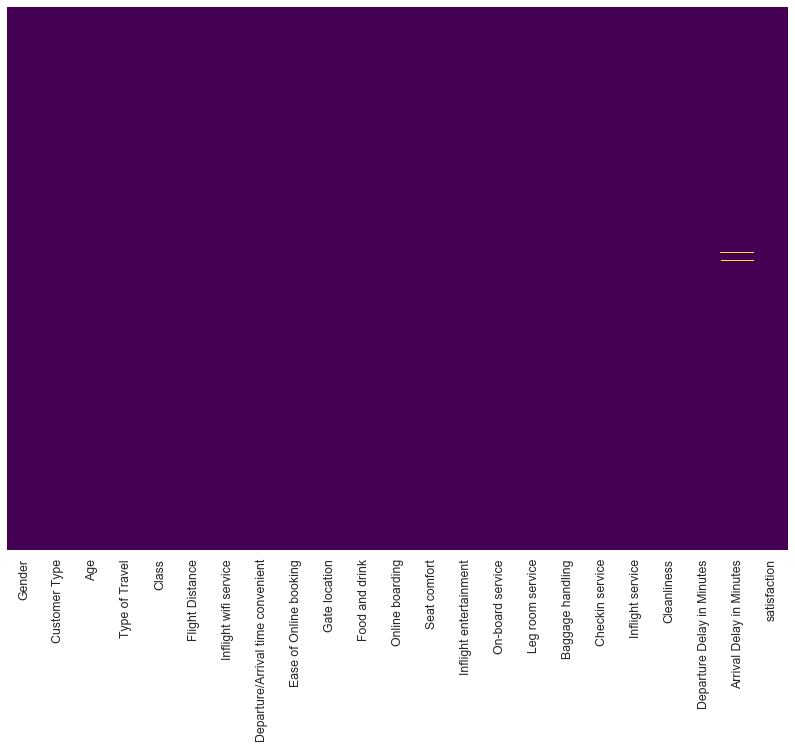

In [6]:
# Checking if there are nan values in the data
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# How many are there?
np.isnan(df['Arrival Delay in Minutes']).value_counts()

False    103594
True        310
Name: Arrival Delay in Minutes, dtype: int64

In [8]:
df['Arrival Delay in Minutes'].mean()

15.178678301832152

In [9]:
# Not too much. The nan values replace the mean.
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
# Checking again
np.isnan(df['Arrival Delay in Minutes']).value_counts()

False    103904
Name: Arrival Delay in Minutes, dtype: int64

In [10]:
## I am doing the same for the test data as above ##

In [11]:
# load the train data to test 
test = pd.read_csv('test.csv')

test = test.drop(['Unnamed: 0', 'id'], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

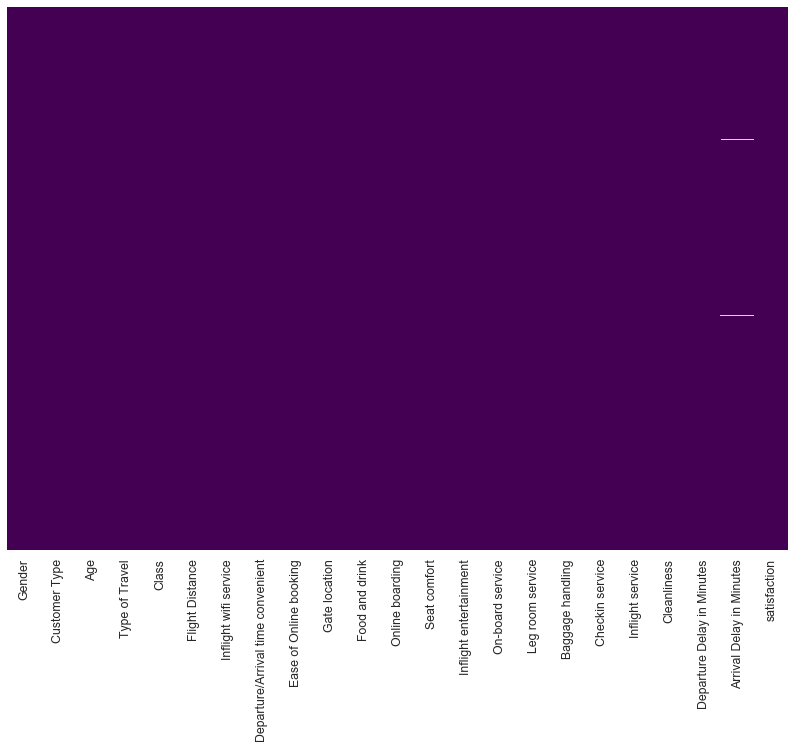

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
np.isnan(test['Arrival Delay in Minutes']).value_counts()

False    25893
True        83
Name: Arrival Delay in Minutes, dtype: int64

In [14]:
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())
np.isnan(test['Arrival Delay in Minutes']).value_counts()

False    25976
Name: Arrival Delay in Minutes, dtype: int64

In [15]:
## -------------------------------------------- ##

Text(0.5, 1.0, 'Neutral or Dissatisfied vs Statisfied')

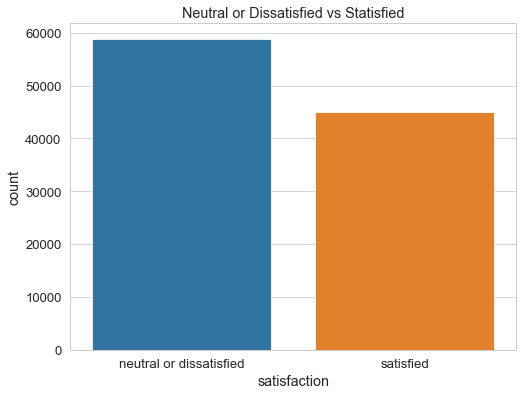

In [16]:
# Graph of neutral or dissatisfied vs satisfied customers
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.countplot(x='satisfaction', data = df).set_title('Neutral or Dissatisfied vs Statisfied')

Text(0.5, 1.0, 'Customer satisfaction by Age')

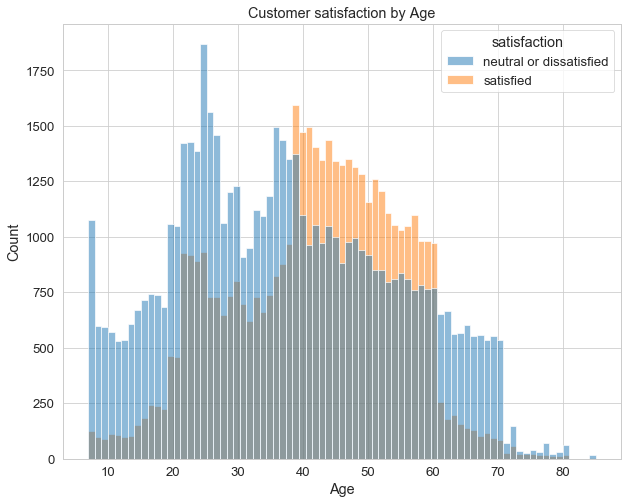

In [17]:
# What does customer satisfaction look like by Age?
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Age', data = df,
             hue ='satisfaction').set_title('Customer satisfaction by Age')

In [18]:
df[(df['Age'] >= 40) & (df['Age'] <= 60)]['Age'].count()

44542

In [19]:
df[(df['Age'] < 40)]['Age'].count()

51386

<p>There are more satisfied customers than dissatisfied customers in the age range from 40 to 60 years.
This age range is 43% of customers.</p>
<br>
<p>Customers under 40 years old = 49%</p>
<p>Customers over 60 years old = 8%</p>

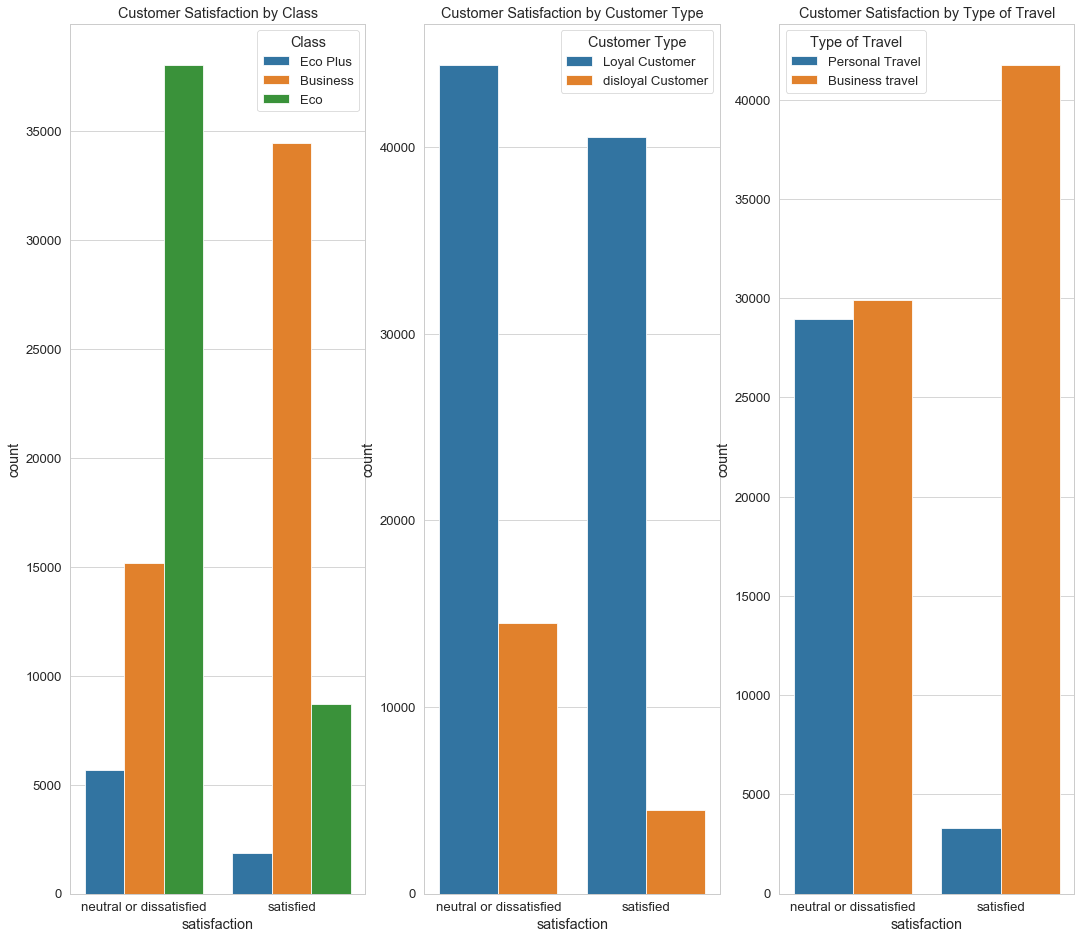

In [20]:
# Graphs of satisfaction customers by Class, Customer Type and Type of Travel.

sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(18,16))
sns.set_context('paper', font_scale=1.5)

ax[0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = df, hue = 'Class', ax=ax[0])

ax[1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = df, hue = 'Customer Type', ax=ax[1])

ax[2].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = df, hue = 'Type of Travel', ax=ax[2])

<p>More are neutral or dissatisfied than satisfied customers in the Eco or Eco Plus class.
The opposite was the case in the Business class, where we have more satisfied customers than neutral or dissatisfied.</p>
<br>

<p>We also know that the type of satisfaction of loyal customers is spread with a slight advantage for neutral or dissatisfied. (40k : 44k) - 84k Loyal Customers</p>

<p>In the case of disloyal customers, the type of satisfaction that is neutral or dissatisfied is slightly over 3 times greater than that of satisfied customers. However, there are almost 4.5 times less disloyal customers than loyal customers. (14.5k : 4.5k) - 19k disloyal Customers</p>
<br>

<p>Most of the business travelers were satisfied. However, the difference is not that big when comparing the number of neutral or dissatisfied customers.</p>

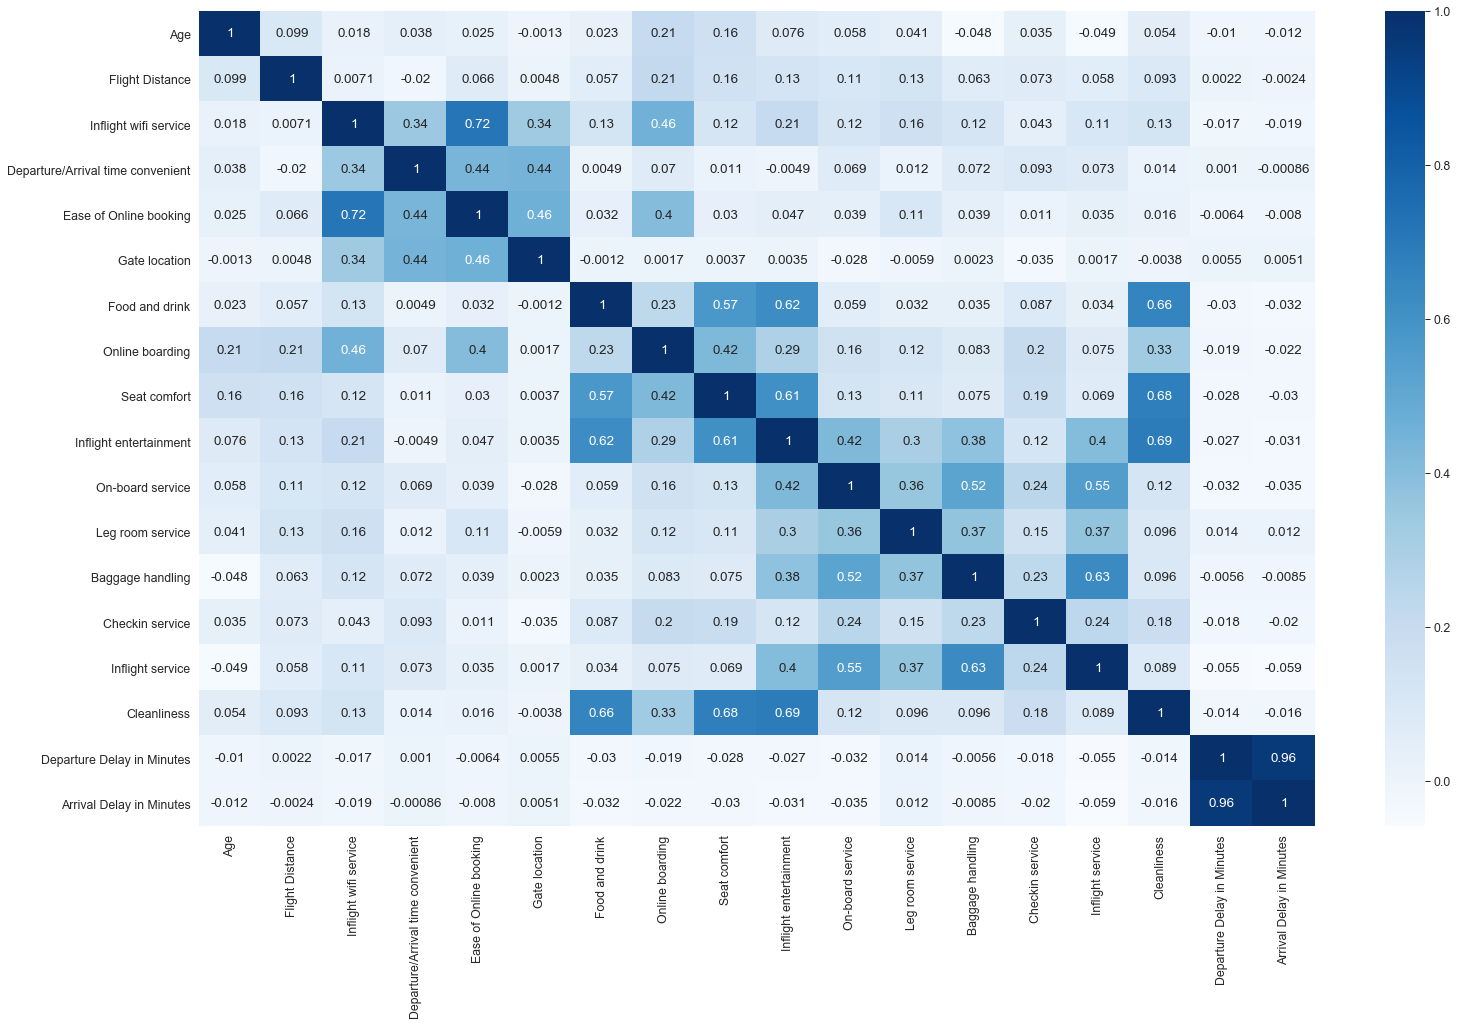

In [21]:
# A glance at the correlations
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
sns.set_context('paper', font_scale=1.4)

crash_mx = df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [22]:
# We know that there are differences between the Business class vs the Eco and Eco plus classes.
# We will see what the average ratings look like in featuers where clients gave scores from 0 to 5.
# We will consider these featuers separately for the business class vs for the Eco and Eco Plus classes.

# Looking at Mean values in Eco and Eco Plus classes
df[df['Class'] != 'Business'].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000,54239.000000
mean,37.370158,743.949003,2.687900,3.201663,2.613083,2.971349,3.091300,2.823522,3.145043,3.104261,3.110308,3.082358,3.438559,3.107524,3.453493,3.111230,15.197957,15.727904
std,16.741301,553.718021,1.229371,1.529219,1.310242,1.191371,1.361851,1.321929,1.358273,1.363120,1.313368,1.341192,1.202105,1.304267,1.195781,1.353622,38.597318,39.077032
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,342.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,36.000000,599.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,985.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,14.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [23]:
# Creates a data frames that contains mean values. For satisfied and neutral or dissatisfied customers
# Eco and Eco Plus Classes
df_s = df[(df['satisfaction'] != 'neutral or dissatisfied') & (df['Class'] != 'Business')].describe()
df_nds = df[(df['satisfaction'] == 'neutral or dissatisfied') & (df['Class'] != 'Business')].describe()

# Creates a data frame that contains only a row with mean values for the selected featuers
# satisfied
df_s_mean = df_s[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'satisfied'
df_s_mean = df_s_mean.rename(index = {'mean':'satisfied'})

###

# Creates a data frame that contains only a row with mean values for the selected featuers
# neutral or dissatisfied
df_nds_mean = df_nds[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'neutral or dissatisfied'
df_nds_mean = df_nds_mean.rename(index = {'mean':'neutral or dissatisfied'})

###

# Combines two data frames into one
final_mean = pd.concat([df_nds_mean, df_s_mean])
final_mean

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
neutral or dissatisfied,2.402687,3.221449,2.473177,2.975466,2.985582,2.615142,3.052685,2.967845,3.062983,3.038518,3.437108,3.085710,3.453678,3.009864
satisfied,3.869701,3.119678,3.192793,2.954291,3.529350,3.686961,3.527738,3.669512,3.306401,3.264011,3.444571,3.197914,3.452726,3.531247


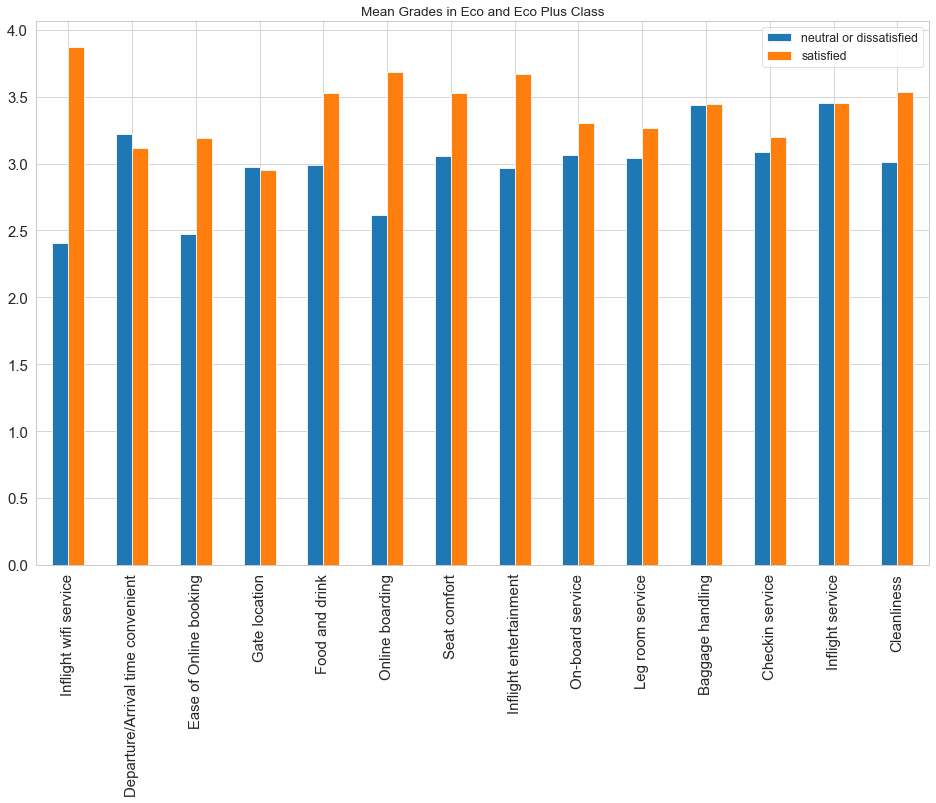

In [24]:
# Graph of Mean Grades in Eco and Eco Plus Class by selected featuers
final_mean.T.plot(figsize=(16,10), fontsize=15, kind = 'bar', 
                          title='Mean Grades in Eco and Eco Plus Class')

Let's focus on neutral or dissatisfied customers:
Low Average grades will appear among others.
<ul>
Top 3:
<li>Inflight wifi service</li>
<li>Ease of Online booking</li>
<li>Online boarding</li>
</ul>
It can be seen that these indicators correlate with each other. Perhaps it would be worth looking at them in real life. This means checking, for example, the operation of wifi (Inflight wifi service) and the system and application, or creating a more user-friendly interface (Online boarding, Ease of Online booking).

Satisfied customers rated these three featuers high, so maybe they didn't always work properly.

In [25]:
## Check the same for business class ##

In [26]:
# Creates a data frames that contains mean values. For satisfied and neutral or dissatisfied customers
# Business Classes
df_sb = df[(df['satisfaction'] != 'neutral or dissatisfied') & (df['Class'] == 'Business')].describe()
df_ndsb = df[(df['satisfaction'] == 'neutral or dissatisfied') & (df['Class'] == 'Business')].describe()

# Creates a data frame that contains only a row with mean values for the selected featuers
# satisfied
df_sb = df_sb[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'satisfied'
df_sb = df_sb.rename(index = {'mean':'satisfied'})

###

# Creates a data frame that contains only a row with mean values for the selected featuers
# neutral or dissatisfied
df_ndsb = df_ndsb[1:2][['Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                       'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 
                       'Cleanliness']]
# Changing  the name of index from 'mean' to 'neutral or dissatisfied'
df_ndsb = df_ndsb.rename(index = {'mean':'neutral or dissatisfied'})


# Combines two data frames into one
final_meanb = pd.concat([df_ndsb, df_sb])
final_meanb

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
neutral or dissatisfied,2.390846,2.863418,2.758841,2.978005,2.878828,2.774053,2.989134,2.682121,2.893052,2.853540,3.200132,2.919921,3.202173,2.723938
satisfied,2.944635,2.924623,2.982280,2.985093,3.518852,4.131613,4.100725,4.055278,4.025812,3.992836,4.125986,3.783092,4.127494,3.809513


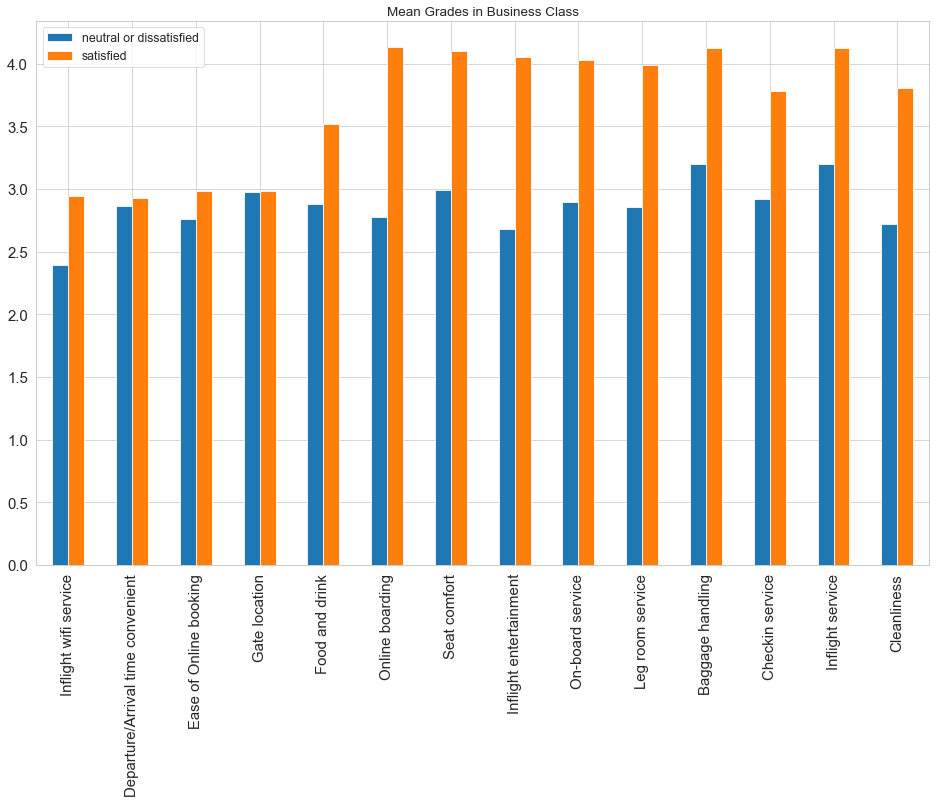

In [27]:
# Graph of Mean Grades in Business Class by selected featuers
final_meanb.T.plot(figsize=(16,10), fontsize=15, kind = 'bar', 
                          title='Mean Grades in Business Class')

Apart from the fact that our top 3 eco-class features are at a low level in the business class and fairly evenly assessed taking into account the difference into satisfaction.

In addition, neutral or dissatisfied business class customers counted on better:
<ul>
<li>Inflight entertainment</li>
<li>Cleanliness</li>
</ul>

Text(0.5, 1.0, 'Histogram of Flight Distance')

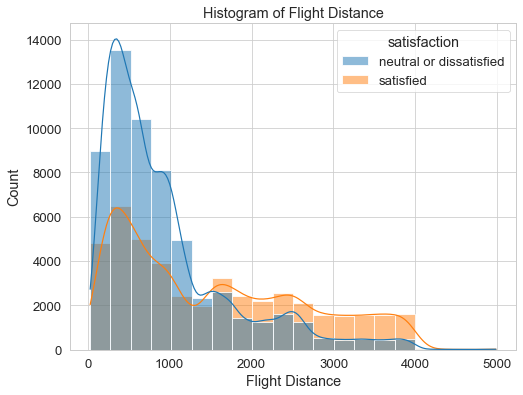

In [28]:
# How does flight distance affect customer satisfaction?

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df, bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance')

Text(0.5, 1.0, 'Histogram of Flight Distance by Eco and Eco Plus Class')

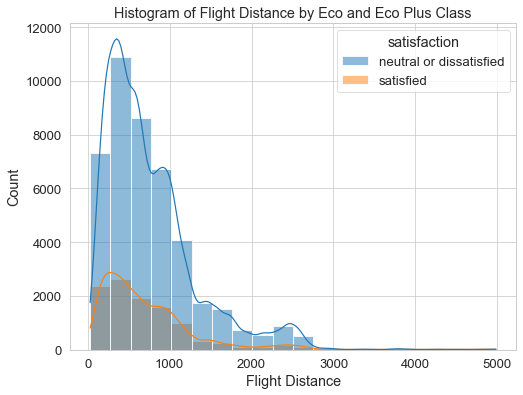

In [29]:
# How is this feautre distributed in the Eco and Eco Plus class?

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df[df['Class'] != 'Business'], bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Eco and Eco Plus Class')

Text(0.5, 1.0, 'Histogram of Flight Distance by Business Class')

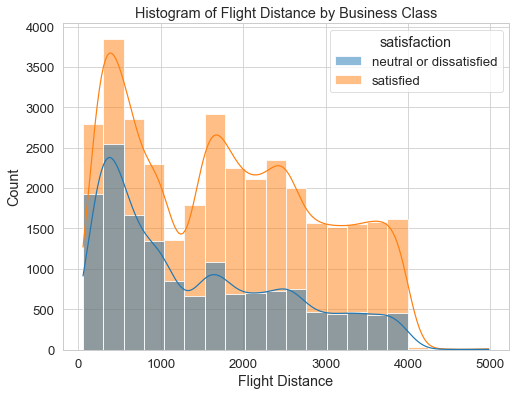

In [30]:
# How is this feautre distributed in the Business class?

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df[df['Class'] == 'Business'], bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Business Class')

<p>In the first chart where we check all customers, you can see that a large proportion of the flights are in the range of 0-1250 (distance). Twice or more clients, depending on the specific distance, are neutral or dissatisfied.
Most of them are in the range of 250 - 750.</p>
<br>
<p>In the Eco and Eco Plus classes, the above conclusion repeats itself, and dissatisfaction in relation to satisfaction occurs with even more customers.</p>
<br>

<p>In the Business class, the number of satisfied customers generally prevails.
On the 0-1250 distance, the advantage of satisfied customers is visible, while above 1250 the advantage is significant.</p>

<br>
If we would like to increase customer satisfaction. Some additions could be considered for customers in the Eco and Eco Plus class who fly 250 - 750. If possible.


Text(0.5, 0.98, 'Departure Delay in Minutes vs Arrival Delay in Minutes')

<Figure size 576x432 with 0 Axes>

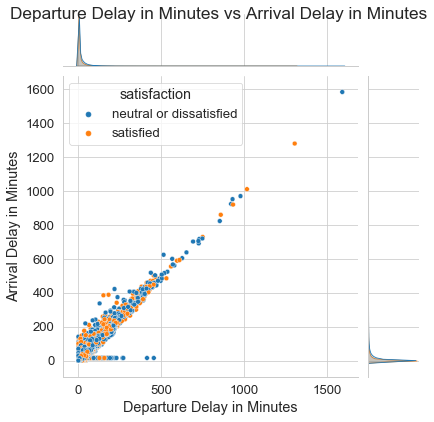

In [31]:
# Departure Delay in Minutes vs Arrival Delay in Minutes
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

g = sns.jointplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', 
              data = df, hue = 'satisfaction')

g.fig.suptitle('Departure Delay in Minutes vs Arrival Delay in Minutes')

Text(0.5, 1.0, 'Histogram of Departure Delay')

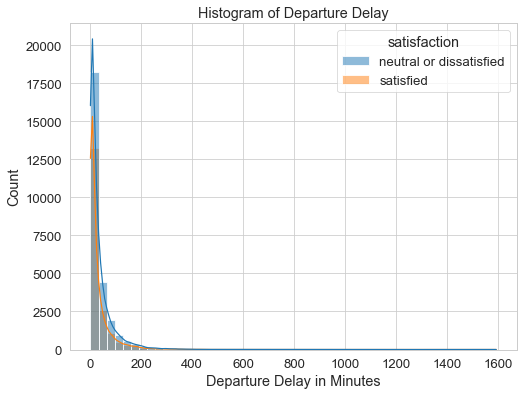

In [32]:
# Histogram of Departure Delay
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Departure Delay in Minutes', data = df[df['Departure Delay in Minutes'] > 0], 
             bins = 50, hue ='satisfaction', kde = True).set_title('Histogram of Departure Delay')

Text(0.5, 1.0, 'Histogram of Arrival Delay')

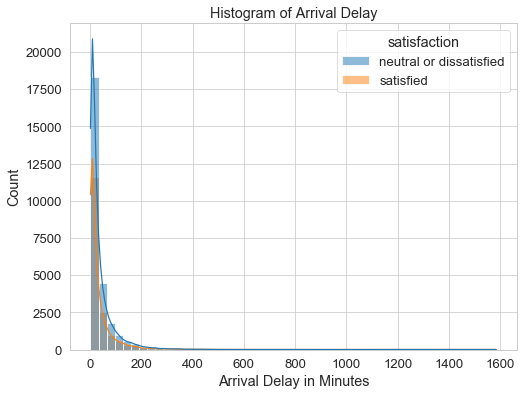

In [33]:
# Histogram of Arrival Delay
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Arrival Delay in Minutes', data = df[df['Arrival Delay in Minutes'] > 1], 
             bins = 50, hue ='satisfaction', kde = True).set_title('Histogram of Arrival Delay')

In general, a delay in departure affects the delay in arrival.

Most of delayed departures and arrivals are about 30 minutes. But there are even cases up to 200 minutes.

How do delays translate into satisfaction?

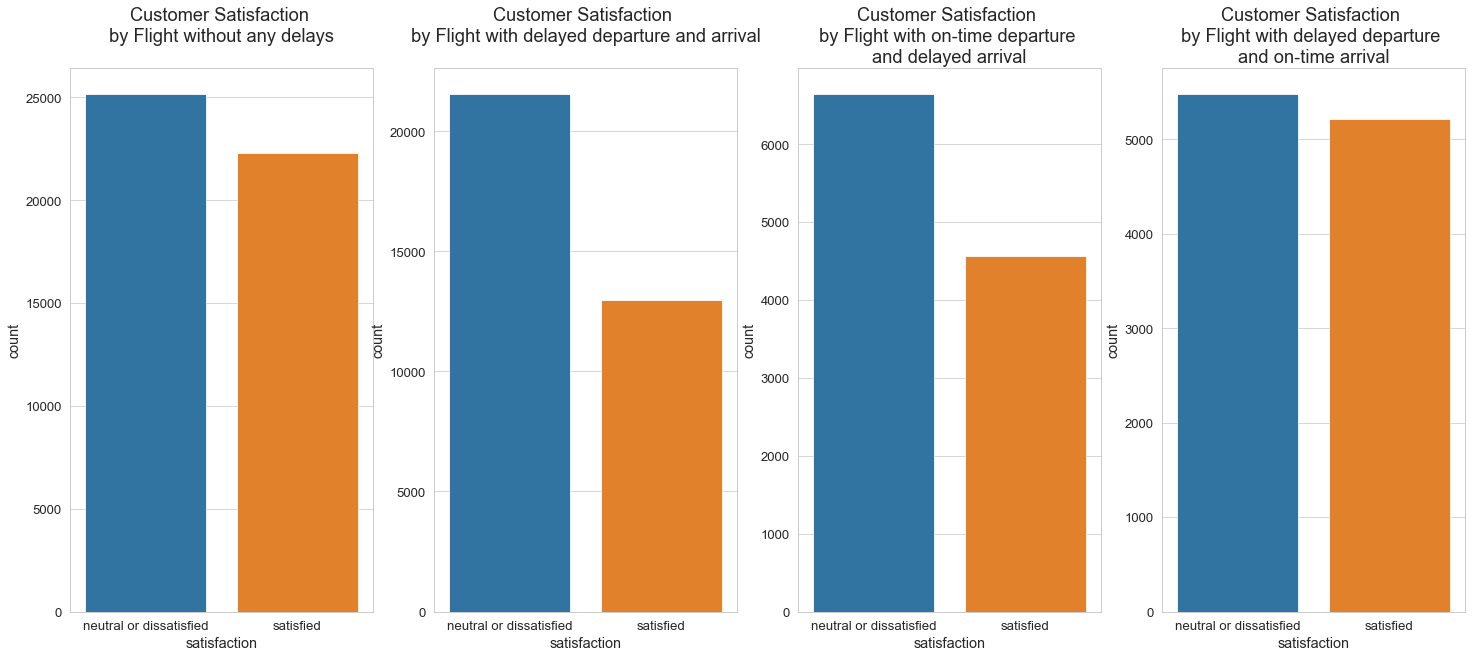

In [34]:
# Graphs of Customer Satisfaction by Departure and Arrival Delay
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(25,10))
sns.set_context('paper', font_scale=1.9)

ax[0].set_title('Customer Satisfaction \nby Flight without any delays\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] == 0)], 
              ax=ax[0])

ax[1].set_title('Customer Satisfaction \nby Flight with delayed departure and arrival\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] > 0)], 
              ax=ax[1])

ax[2].set_title('Customer Satisfaction \nby Flight with on-time departure \nand delayed arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] > 0)], 
              ax=ax[2])

ax[3].set_title('Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data = df[(df['Departure Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] == 0)], 
              ax=ax[3])

<p>Generally, there is high neutral or dissatisfaction with customers everywhere, but it makes sense because there were more of them.
However, it can be seen that arriving on time, despite a delayed departure, is important because you can see almost an equal number of satisfied and neutral or dissatisfied customers.</p>

<h4>Prediction</h4>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [36]:
# First deal with features that are objects, using get_dummies

#train data
train = pd.get_dummies(df, drop_first = False, columns = ['Gender', 'Customer Type', 
                                                         'Type of Travel', 'Class'])
#test data
test = pd.get_dummies(test, drop_first = False, columns = ['Gender', 'Customer Type', 
                                                         'Type of Travel', 'Class'])

In [37]:
# Changing feature satisfaction:
# 1 - satisfied
# 0 - neutral or dissatisfied

train['satisfaction'] = train['satisfaction'].apply(lambda x: np.where(x=='satisfied', 1, 0))
test['satisfaction'] = test['satisfaction'].apply(lambda x: np.where(x=='satisfied', 1, 0))

In [38]:
# preparing train_test_set
X_train = train.drop('satisfaction', axis = 1)
y_train = train['satisfaction']

X_test = test.drop('satisfaction', axis = 1)
y_test = test['satisfaction']

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [39]:
# making a dictionary in which we include two models with some parameters pre-set.
model_params = {
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1, 5, 10, 100]
        }
    },
    
    'logistics_regression' : {
        'model' : LogisticRegression(solver = 'lbfgs', multi_class = 'auto'),
        'params' : {
            'C' : [0.1, 1, 10, 100],
            'solver' : ['lbfgs', 'liblinear']
        }
    }
}

In [40]:
# implement GridSearchCV for two models using a loop and a previously created dictionary
# in the created variable scores, we save best_score and best_params for each model
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    print(mp['model'])
    print('\nfitting...')
    clf.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    print('\nscore is appended\n')

RandomForestClassifier()

fitting...

score is appended

LogisticRegression()

fitting...

score is appended



In [41]:
# making data frame with best scores and best params
sc = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
sc

,model,best_score,best_params
0,random_forest,0.963405,{'n_estimators': 100}
1,logistics_regression,0.874330,"{'C': 100, 'solver': 'liblinear'}"


<h4>Random Forest<h4>

In [42]:
# implementing Random Forest model with best_params
clf_rfc = RandomForestClassifier(n_estimators =  100)
clf_rfc.fit(X_train, y_train)

RandomForestClassifier()

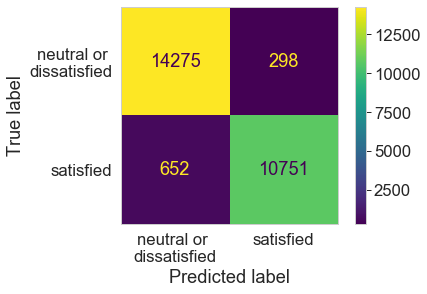

In [43]:
# confusion matrix RFC
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(clf_rfc,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['neutral or \ndissatisfied', 'satisfied'])

In [44]:
# Create a classification report for the RFC model 
predictions_rfc = clf_rfc.predict(X_test)

# Create a classification report for the RFC model 
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Random Forest did quite well. We have a precision of 96%.
The remaining ratios are at the level of 94% - 98%.